## 로지스틱 회귀

### 1. 확률 추정

- 샘플이 이진 클래스(0, 1로만 이루어진 이항 변수)에 속할 확률을 추정하는 데 활용하는 데이터 분석 방법
- "특정 입력 Feature x(독립변수)의 증감에 따른, 각 클래스에 속하는 확률의 추정치"를 알고 싶은 경우에 활용
- 입력 Feature의 weighted sum을 계산한(bias 포함) 결과값이 0~1사이의 확률값이 출력되고, 이러한 출력 확률값에 분류 기준값(cut-off value)를 이용하여 클래스가 분류됨
- 이진 분류의 경우 cuf-off value를 0.5로 가정 시, P(Y=1) > 0.5의 추정확률을 가지는 경우는 1로, 그 반대의 경우 0으로 분류됨    
- 예측 확률이 설명 변수의 값 증감에 따라 0~1 사이의 어떠한 확률값으로 변환하도록 하기 위해 Sigmoid 함수(로짓함수)를 활용
- Sigmoid 함수 수식 표현에 따른 이해 

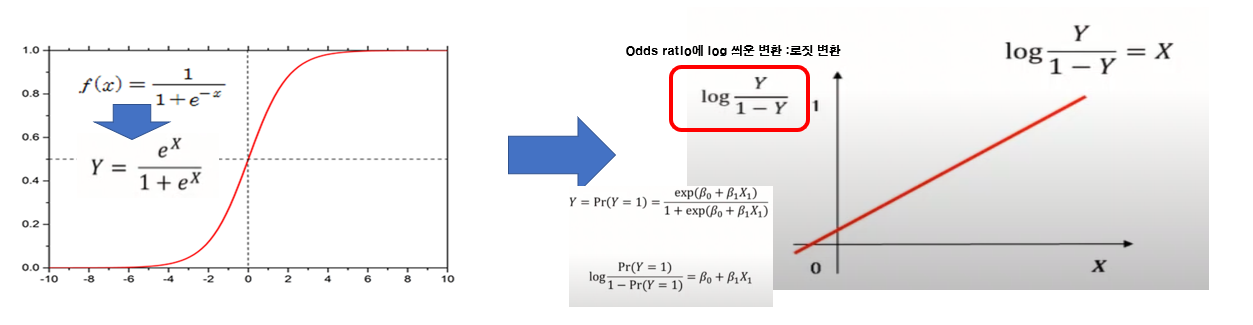

### 2. 훈련과 비용함수

- 훈련 방법 
  * 실제 양성인 경우(y=1)에 대해 높은 확률(P(y=1))로 양성인 확률을 추정하고, 그렇지 않은 확률(P(y=0))은 낮은 확률로 추정(그 반대의 경우도 동일)하는 모델의 최적 파라미터를 찾는 과정

- 비용함수(Cost function)
  * 하나의 샘플에 대한 비용함수는 아래와 같이 표현
  * 실제로 양성인 경우 음성(0)에 가까운 확률로 예측시 Cost가 크게 증가하고, 그 반대의 경우 0에 가까워지도록 -log 함수를 활용 

 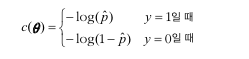

  * 전체 training set에 대한 Cost function은 모든 training set에 대한 cost function을 평균한 형태로 표현되며(Log Loss), 해당 함수는 볼록 함수 형태이므로, Gradient Descent(편미분)를 이용하여 Global Minimum값(최적의 weight 파라미터)을 구할 수 있음

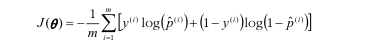

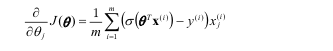

### 3. 결정 경계

사례) 꽃잎의 너비를 기반으로 Iris-versicolor 종을 감지하는 분류기 모델

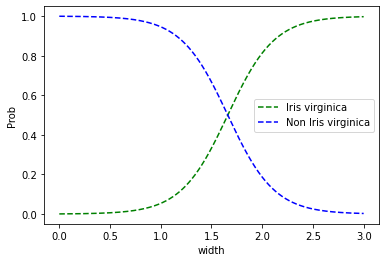

In [67]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris['data'][:, 3:] ## 꽃잎의 너비에 해당하는 Feature Data
y = (iris['target'] == 2).astype(np.int)

### 로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y) 

### 꽃잎 너비가 0~3cm인 꽃에 대해 모델의 추정확률(Versicolor일 확률)을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new)  ## 각 클래스에 속할 확률값
plt.plot(X_new, y_proba[:, 1], '--g', label="Iris virginica")  ## Virsinica일 추정 확률 값
plt.plot(X_new, y_proba[:, 0], '--b', label="Non Iris virginica")  ## Virsinica가 아닐 추정 확률 값
plt.legend()
plt.ylabel("Prob")
plt.xlabel("width")
plt.show()

양쪽의 확률이 50%가 되는 1.6cm근방에서 결정 경계가 만들어짐

사례) 꽃잎 너비, 길이 두개 feature로 하여 training할 경우 15%~90%에 해당하는 나란한 직선들은 모델이 특정 확률을
출력하는 포인트를 보여주며, 맨 오른쪽 위의 직선을 넘어서는 feature값을 가질 경우 90% 확률로 Iris-virsinica로 판단함을 의미

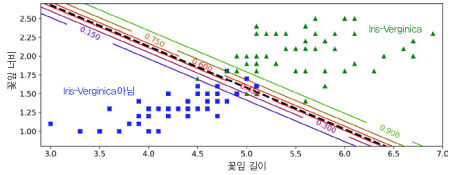

### 4. 소프트맥스 회귀

- 로지스틱 회귀 모델의 경우, 이진 분류 외에 다중 클래스 분류 지원 가능
- 샘플 x가 주어졌을 때, 각 클래스에 해당하는 output score를 계산하고, 그 output score를 softmax 함수를 적용하여 각 클래스에 해당하는 확률값을 계산한 뒤, 추정 확률이 가장 높은 클래스를 선택
- softmax 회귀 모델의 경우, 타깃에 해당하는 클래스에 대해 높은 확률을 추정 가능하도록
크로스 엔트로피라는 Cost function을 이용하여 모델의 최적 파라미터를 구함

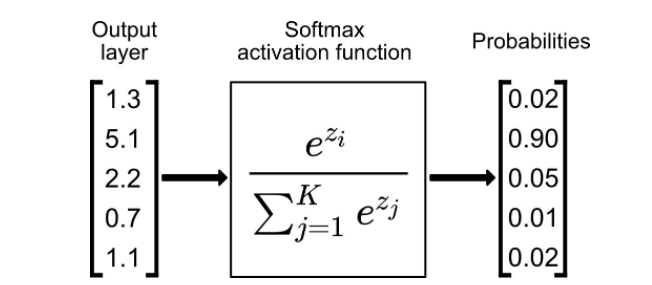

softmax 회귀모델 code 사례
- LogisticRegression 모델 선언 시, 하이퍼 파라미터인 multi_class, solver등의 값을 softmax 회귀를 지원하는 형태로 지정해야 함  

In [71]:
X = iris['data'][:, (2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

softmax_reg.fit(X, y)

print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
